<a href="https://colab.research.google.com/github/chandankr014/Deep_learning/blob/main/LSTM_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LSTM - Long Term Short Memory

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM


In [ ]:
def prepareData(timeseries_data, n_timesteps):
  x, y = [], []
  for i in range(len(timeseries_data)):
    end = i + n_timesteps
    if end > len(timeseries_data)-1:
      break
    seqx, seqy = timeseries_data[i:end], timeseries_data[end]
    x.append(seqx)
    y.append(seqy)
  return np.array(x), np.array(y)



In [ ]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_timesteps = 3

In [ ]:
x, y = prepareData(timeseries_data, n_timesteps)
x,y

(array([[110, 125, 133],
        [125, 133, 146],
        [133, 146, 158],
        [146, 158, 172],
        [158, 172, 187],
        [172, 187, 196]]), array([146, 158, 172, 187, 196, 210]))

In [ ]:
 x.shape, y.shape

((6, 3), (6,))

In [ ]:
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))
x.shape

(6, 3, 1)

*we always need to reshape our data in 3-dimentions in LSTM*<br>
**reshape from [samples, timesteps] to [samples, timesteps, features=1]**

---
<h2><font color=lime> Building LSTM Model </font></h2>

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#fitting model in this architecture
model.fit(x, y, epochs=200, verbose=1)

###prediction

In [47]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
list_output = []
i=0
while(i<10):
  if len(temp_input)>3:
    x_input = np.array(temp_input[1:])
    x_input = x_input.reshape((1, n_timesteps, n_features))
    yhat = model.predict(x_input, verbose=1)
    #print("{} day output {}".format(i, yhat))
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]
    list_output.append(yhat[0][0])
    i=i+1
  else:
    x_input = x_input.reshape((1, n_timesteps, n_features))
    yhat = model.predict(x_input, verbose=1)
    #print(yhat[0])
    temp_input.append(yhat[0][0])
    list_output.append(yhat[0][0])
    i = i+1

print(list_output)

1/1 [==============================] - 0s 19ms/step
[224.7549, 236.69102, 252.13667, 267.6873, 282.46317, 299.73706, 317.19705, 334.9441, 354.63443, 374.81555]


In [48]:
def find_diff(arr):
  for i in range(1,len(arr)):
    diff = arr[i] - arr[i-1]
    print(diff)
find_diff(list_output)

11.936127
15.445648
15.550613
14.775879
17.273895
17.459991
17.74704
19.690338
20.181122


###plotting graphs

In [49]:
import matplotlib.pyplot as plt

In [51]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)
day_new

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

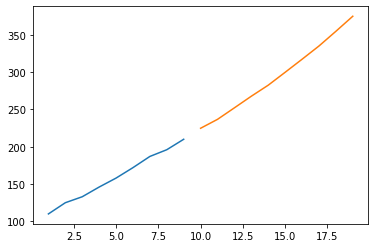

In [52]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, list_output)